In [1]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

data_names = ["webcam_test_2017-09-30-12-26-14.csv", 
              "webcam_test_2017-09-30-12-05-22.csv", 
              "webcam_test_2017-09-30-11-56-56.csv", 
              "webcam_test_2017-09-26-19-32-41.csv", 
              "webcam_test_2017-09-22-19-39-14.csv", 
              "webcam_test_2017-09-21-19-08-36.csv", 
              "webcam_test_2017-09-20-19-11-17.csv", 
              "webcam_test_2017-09-18-19-45-21.csv", 
              "webcam_test_2017-09-17-19-08-31.csv", 
              "webcam_test_2017-09-16-19-11-16.csv", 
              "webcam_test_2017-09-14-19-45-24.csv", 
              "webcam_test_2017-09-13-18-00-31.csv", 
              "webcam_test_2017-09-11-19-06-39.csv",
              "webcam_test_2017-09-07-19-57-06.csv",
              "webcam_test_2017-09-06-20-06-47.csv",
              "webcam_test_2017-09-05-19-55-53.csv",
              "webcam_test_2017-09-03-13-02-36.csv",
              "webcam_test_2017-09-01-15-08-44.csv"]
label_names = ["annos_s17_2017-09-30_3.csv", 
               "annos_s17_2017-09-30_2.csv", 
               "annos_s17_2017-09-30_1.csv", 
               "annos_s16_2017-09-26.csv", 
               "annos_s14_2017-09-22.csv", 
               "annos_s13_2017-09-21.csv", 
               "annos_s12_2017-09-20.csv", 
               "annos_s11_2017-09-18.csv", 
               "annos_s10_2017-09-17.csv", 
               "annos_s9_2017-09-16.csv", 
               "annos_s8_2017-09-14.csv", 
               "annos_s7_2017-09-13.csv", 
               "annos_s6_2017-09-11.csv", 
               "annos_s5_2017-09-07.csv", 
               "annos_s4_2017-09-06.csv", 
               "annos_s3_2017-09-05.csv", 
               "annos_s2_2017-09-03.csv", 
               "annos_s1_2017-09-01.csv"]


# new_data = []
# labels = []
# label_bools = []
new_data = pd.DataFrame() #creates a new dataframe that's empty
labels = pd.DataFrame()
label_bools = pd.DataFrame()
for data_set in range(len(data_names)):
    curr_data = pd.read_csv(data_names[data_set])
    curr_labels =  pd.read_csv(label_names[data_set])

    diff = len(curr_data) - len(curr_labels)

    if diff > 0:
        curr_data = curr_data[:-diff]
    if diff < 0:
        diff = diff * -1
        curr_labels = curr_labels[:-diff]
    
    print(curr_data.shape)
    print(curr_labels.shape)
    curr_new_data = curr_data[curr_data[' confidence'] > .70] 
    removed_data = curr_data[curr_data[' confidence'] <= .70] 
    
    
    #align the data
    aligned_labels = []


    
    #labels.drop(removed_data["frame"])
    newFrames = []
    for index, row in removed_data.iterrows():
        newFrames.append(int(row["frame"]) - 1)
    curr_labels = curr_labels.drop(newFrames)

    
    curr_labels = curr_labels["C_Gaze"]
    curr_label_bools = []
    for i in range(len(curr_labels)):
        if curr_labels.values[i] == "away":
            curr_label_bools.append(False)
        else: 
            curr_label_bools.append(True)
    curr_new_data = curr_new_data.drop(["frame", " face_id", " timestamp", " confidence", " success"], 1)
    new_data = new_data.append(curr_new_data, ignore_index = True)
    labels = labels.append(curr_labels, ignore_index = True)
    label_bools = label_bools.append(curr_label_bools, ignore_index = True)
#     new_data.append(curr_new_data)
#     labels.append(curr_labels)
#     label_bools.append(curr_label_bools)

#label_bools

#new_data is data
#labels is annotations

new_data_test = new_data[19358:]
new_data_train = new_data[:19357]

#trains vanilla log reg with unmodified data using l2 regularization
labels_test = label_bools[19358:]
labels_train = label_bools[:19357]
# print(new_data.shape)
# print(new_data_test.shape)
# print(new_data_train.shape)
# print(labels_test.shape)
# print(labels_train.shape)


Using TensorFlow backend.


(6562, 714)
(6562, 5)
(7551, 714)
(7551, 5)
(7441, 714)
(7441, 5)
(2314, 714)
(2314, 5)
(7174, 714)
(7174, 5)
(5128, 714)
(5128, 5)
(10632, 714)
(10632, 5)
(7673, 714)
(7673, 5)
(6772, 714)
(6772, 5)
(6451, 714)
(6451, 5)
(19942, 714)
(19942, 5)
(12563, 714)
(12563, 5)
(12976, 714)
(12976, 5)
(12705, 714)
(12705, 5)
(10266, 714)
(10266, 5)
(13130, 714)
(13130, 5)
(12448, 714)
(12448, 5)
(12055, 714)
(12055, 5)


In [2]:
x_train, x_val, y_train, y_val = train_test_split(new_data, label_bools,
                                                  test_size = .0001,
                                                  random_state=12)

In [4]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(200, input_dim=709, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, input_dim=200, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 10
np.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=1)
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
results = cross_val_score(estimator, x_train_res, y_train_res, cv=kfold)
print(results)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/10
83792/83792 [==============================] - 29s 352us/step - loss: 8.0599 - acc: 0.4999
Epoch 2/10
83792/83792 [==============================] - 31s 374us/step - loss: 8.0598 - acc: 0.5000
Epoch 3/10
83792/83792 [==============================] - 33s 393us/step - loss: 8.0598 - acc: 0.5000
Epoch 4/10
83792/83792 [==============================] - 34s 412us/step - loss: 8.0598 - acc: 0.5000
Epoch 5/10
83792/83792 [==============================] - 30s 356us/step - loss: 8.0598 - acc: 0.5000
Epoch 6/10
83792/83792 [==============================] - 32s 379us/step - loss: 8.0598 - acc: 0.5000
Epoch 7/10
83792/83792 [==============================] - 33s 398us/step - loss: 8.0598 - acc: 0.5000
Epoch 8/10
54485/83792 [==================>...........] - ETA: 11s - loss: 8.0364 - acc: 0.5014

KeyboardInterrupt: 

In [4]:
LogReg = LogisticRegression(max_iter=10000, penalty='l2', tol=.0001, class_weight="balanced")

LogReg.fit(new_data_train, labels_train)
#uses model to predict on test data
y_pred = LogReg.predict(new_data_test)
#evaluates results
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 1863,  1039],
       [ 1247, 14855]])

In [5]:
#shortens the data to only take leftmost n features
n = 160
new_data_train_short = new_data_train.iloc[:,0:n]
new_data_test_short = new_data_test.iloc[:,0:n]
#uses fewer featured data to train log reg
LogReg = LogisticRegression(max_iter=10000, penalty='l2', tol=.0001, class_weight="balanced")

LogReg.fit(new_data_train_short, labels_train)

y_pred = LogReg.predict(new_data_test_short)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

array([[ 1881,  1021],
       [ 1494, 14608]])

In [19]:
#fits svm to data
from sklearn import svm
clf = svm.SVC(gamma="scale", C=1)
clf.fit(new_data_train, labels_train)  

#evaluates svm
y_pred = clf.predict(new_data_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

array([[  721,  2181],
       [  445, 15657]])

In [5]:
#reduces data dimensionality
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=160)
new_data_train_pca = pca.fit_transform(StandardScaler().fit_transform(x_train))
new_data_test_pca = pca.fit_transform(StandardScaler().fit_transform(new_data_test))


In [33]:
#runs log reg on pca dimensionaity reduced data
LogReg = LogisticRegression(max_iter=10000, penalty='l2', tol=.0001)

LogReg.fit(new_data_train_pca, labels_train)

y_pred = LogReg.predict(new_data_test_pca)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

array([[  500,  2402],
       [ 2322, 13780]])

In [37]:
#grabs data to graph
#note: pca needs to reduce to 2 for this to work
test_pd = pd.DataFrame(data=labels_train)
test_pd2 = pd.DataFrame(data=new_data_train_pca)
graph_data = pd.concat([test_pd2, test_pd], axis = 1)
graph_data.columns = ['principal component 1', 'principal component 2', 'label']

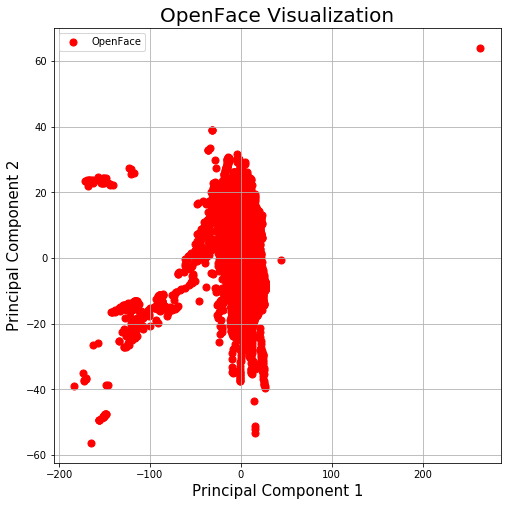

In [38]:
#graphs pca data

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('OpenFace Visualization', fontsize = 20)
targets = ['OpenFace']
ax.scatter(new_data_train_pca[:,0] , new_data_train_pca[:,1] , c = 'r' , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

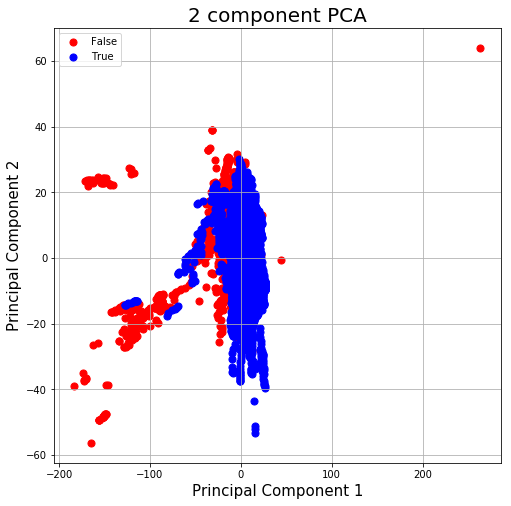

In [39]:
#graphs pca data with colors for true and false, true on top
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [False, True]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = graph_data['label'] == target
    ax.scatter(graph_data.loc[indicesToKeep, 'principal component 1']
               , graph_data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

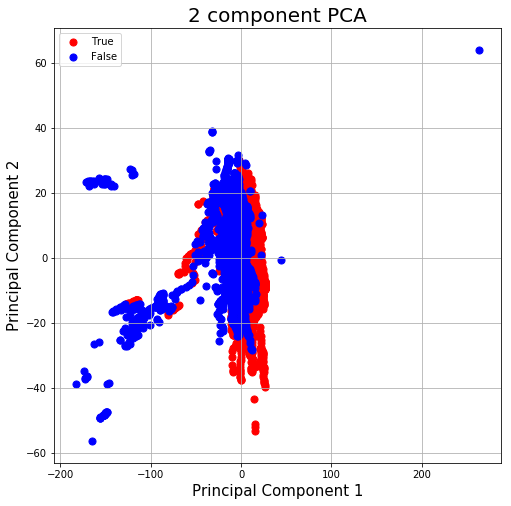

In [40]:
#graphs pca data with colors for true and false, false on top
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = graph_data['label'] == target
    ax.scatter(graph_data.loc[indicesToKeep, 'principal component 1']
               , graph_data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#creates a kernel pca with gamma g and n components
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", gamma=1, n_components=2)
kpca.fit(x_train_res)

In [48]:
new_data_train_kpca = kpca.fit_transform(new_data_train)
new_data_test_kpca = kpca.fit_transform(new_data_test)


In [50]:
#sets up kernel pca data to be graphed
test_pd = pd.DataFrame(data=labels_train)
test_pd2 = pd.DataFrame(data=new_data_train_kpca)
graph_data2 = pd.concat([test_pd2, test_pd], axis = 1)
graph_data2.columns = ['principal component 1', 'principal component 2', 'label']

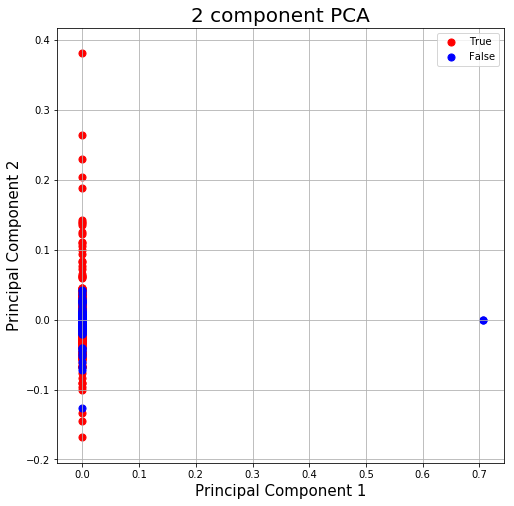

In [51]:
#graphs kernel pca data
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = graph_data2['label'] == target
    ax.scatter(graph_data2.loc[indicesToKeep, 'principal component 1']
               , graph_data2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
from keras.layers import Dropout
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(200, input_dim=160, kernel_initializer='normal', activation='relu'))
    model.add(Dense(160, input_dim=200, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, input_dim=160, kernel_initializer='normal', activation='relu'))
    model.add(Dense(75, input_dim=100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, input_dim=75, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, input_dim=50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, input_dim=20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 10
np.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=30, batch_size=10, verbose=1)
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=seed)
results = cross_val_score(estimator, new_data_train_pca, y_train, cv=kfold)
print(results)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/30
121182/121182 [==============================] - 31s 253us/step - loss: 0.1127 - acc: 0.96274 -  - ETA: 0s - loss: 0
Epoch 2/30
121182/121182 [==============================] - 30s 245us/step - loss: 0.0712 - acc: 0.9758
Epoch 3/30
 68720/121182 [================>.............] - ETA: 12s - loss: 0.0547 - acc: 0.9813

KeyboardInterrupt: 

In [16]:
from keras.layers import Dropout
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(200, input_dim=160, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(160, input_dim=200, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, input_dim=160, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(75, input_dim=100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, input_dim=75, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, input_dim=50, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=20, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 10
np.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=10, verbose=1)
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=seed)
results = cross_val_score(estimator, new_data_train_pca, y_train, cv=kfold)
print(results)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/300
121182/121182 [==============================] - 39s 325us/step - loss: 0.2157 - acc: 0.9295
Epoch 2/300
121182/121182 [==============================] - 41s 341us/step - loss: 0.1847 - acc: 0.9415
Epoch 3/300
121182/121182 [==============================] - 35s 288us/step - loss: 0.1728 - acc: 0.9446
Epoch 4/300
121182/121182 [==============================] - 33s 272us/step - loss: 0.1690 - acc: 0.9458
Epoch 5/300
121182/121182 [==============================] - 34s 283us/step - loss: 0.1663 - acc: 0.9466
Epoch 6/300
121182/121182 [==============================] - 34s 283us/step - loss: 0.1611 - acc: 0.9473
Epoch 7/300
121182/121182 [==============================] - 33s 272us/step - loss: 0.1581 - acc: 0.9479
Epoch 8/300
121182/121182 [==============================] - 33s 274us/step - loss: 0.1570 - acc: 0.9490
Epoch 9/300
121182/121182 [==============================] - 34s 279us/step - loss: 0.1532 - acc: 0.9500
Epoch 10/300
121182/121182 [===========================

KeyboardInterrupt: 

In [ ]:
#final neural network. Achieves 99.7% accuracy
from keras.layers import Dropout
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(200, input_dim=160, kernel_initializer='normal', activation='relu'))
    model.add(Dense(160, input_dim=200, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, input_dim=160, kernel_initializer='normal', activation='relu'))
    model.add(Dense(75, input_dim=100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, input_dim=75, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 10
np.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=30, batch_size=10, verbose=1)
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=seed)
results = cross_val_score(estimator, new_data_train_pca, y_train, cv=kfold)
print(results)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/30
121182/121182 [==============================] - 30s 247us/step - loss: 0.1110 - acc: 0.9632
Epoch 2/30
121182/121182 [==============================] - 29s 238us/step - loss: 0.0680 - acc: 0.97682s - loss:  - ETA: 1s - loss: - ETA: 0s - loss: 0.0
Epoch 3/30
121182/121182 [==============================] - 28s 232us/step - loss: 0.0498 - acc: 0.9829
Epoch 4/30
121182/121182 [==============================] - 28s 235us/step - loss: 0.0402 - acc: 0.9866
Epoch 5/30
121182/121182 [==============================] - 30s 250us/step - loss: 0.0353 - acc: 0.9881
Epoch 6/30
121182/121182 [==============================] - 33s 268us/step - loss: 0.0291 - acc: 0.9898
Epoch 7/30
121182/121182 [==============================] - 30s 244us/step - loss: 0.0260 - acc: 0.99133s - lo
Epoch 8/30
121182/121182 [==============================] - 28s 231us/step - loss: 0.0223 - acc: 0.9920
Epoch 9/30
121182/121182 [==============================] - 28s 233us/step - loss: 0.0218 - acc: 0.9926
Epoch 